## CODE TO DETECT LINES IN IMAGE 
  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# https://pythonprogramming.net/lane-region-of-interest-python-plays-gta-v/ 

In [6]:
# image_c = cv2.imread('horizontal_vertical.jpg')
image_c = cv2.imread('calendar.jpg')

cv2.imshow('Given Image', image_c)
cv2.waitKey(0)
cv2.destroyAllWindows()

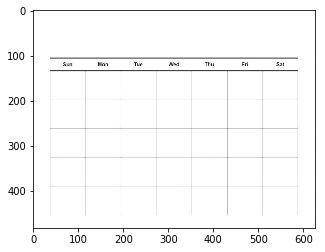

In [3]:
plt.imshow(image_c)

In [4]:

image_g = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)
image_canny = cv2.Canny(image_g, 50, 200, apertureSize = 3)
image_canny

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0, 255,   0],
       ...,
       [255,   0,   0, ...,   0, 255,   0],
       [255,   0,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [7]:
cv2.imshow('canny image', image_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:

# rho accuracy of 1 pixel and theta accuracy of np.pi / 180 (1 degree)
# threshold is number of points on line
# Try 300, 400 and 500
lines = cv2.HoughLines(image_canny, 1, np.pi/180, 300)


In [9]:
lines
# Note that 1.57 rad is 89.95437
# Note that rho was the distance from the origin

array([[[  0.       ,   1.5707964]],

       [[481.       ,   1.5707964]],

       [[105.       ,   1.5707964]],

       [[107.       ,   1.5707964]],

       [[198.       ,   1.5707964]],

       [[200.       ,   1.5707964]],

       [[261.       ,   1.5707964]],

       [[263.       ,   1.5707964]],

       [[389.       ,   1.5707964]],

       [[391.       ,   1.5707964]],

       [[453.       ,   1.5707964]],

       [[455.       ,   1.5707964]],

       [[136.       ,   1.5707964]],

       [[133.       ,   1.5707964]],

       [[  0.       ,   0.       ]],

       [[325.       ,   1.5707964]],

       [[327.       ,   1.5707964]],

       [[624.       ,   0.       ]],

       [[432.       ,   0.       ]],

       [[194.       ,   0.       ]],

       [[196.       ,   0.       ]],

       [[430.       ,   0.       ]],

       [[117.       ,   0.       ]],

       [[272.       ,   0.       ]],

       [[351.       ,   0.       ]],

       [[274.       ,   0.       ]],

       [[353

In [17]:
len(lines)

30

In [18]:
lines.shape

(30, 1, 2)

In [10]:
 if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            
            x0 = rho * np.cos(theta)
            y0 = rho * np.sin(theta)
            
            a = np.cos(theta)
            b = np.sin(theta)
           
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image_c, (x1, y1), (x2, y2), (255, 0, 0), 2)
            
cv2.imshow('Hough Lines', image_c)
cv2.waitKey(0)
cv2.destroyAllWindows()